<a href="https://colab.research.google.com/github/TheStrangeGuy/Customer-Churn/blob/main/CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TeamEpic/dataset.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


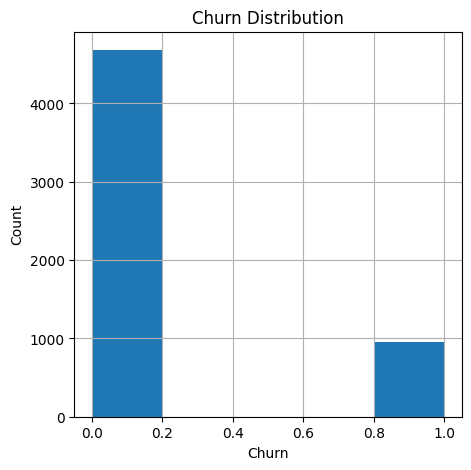

In [ ]:
df['Churn'].hist(bins=5, figsize=(5, 5))
plt.title(f'Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


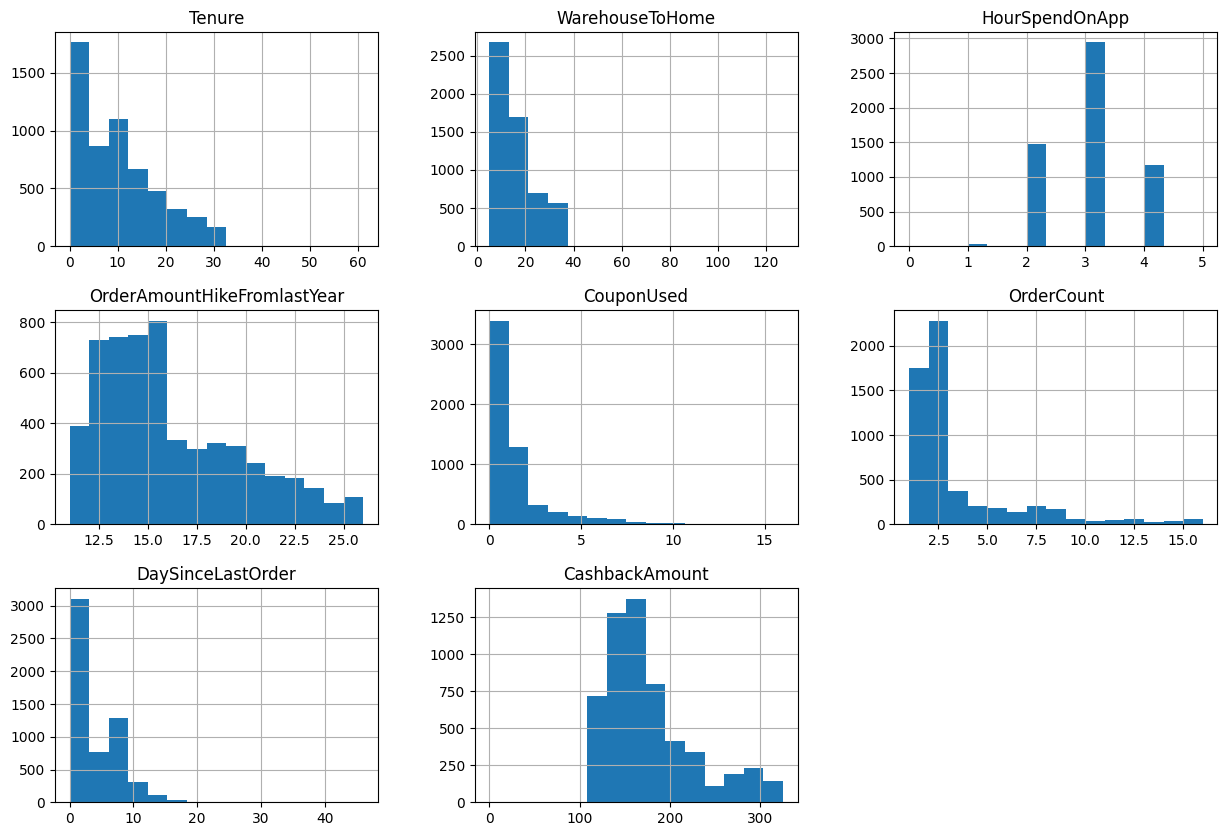

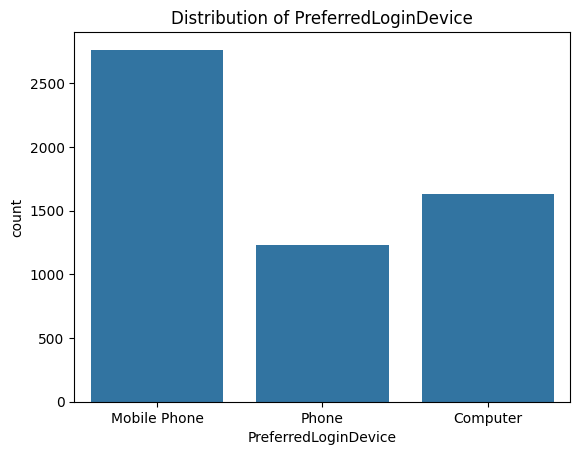

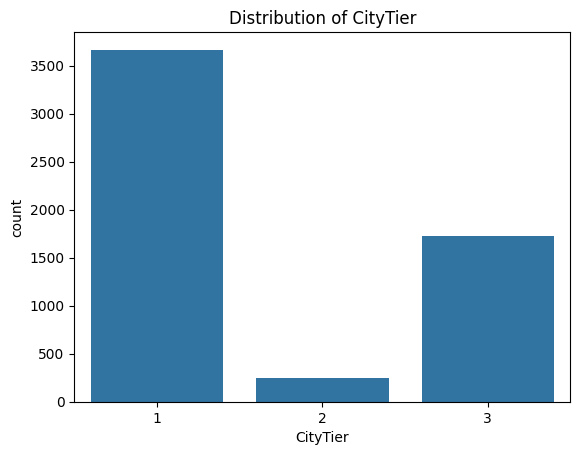

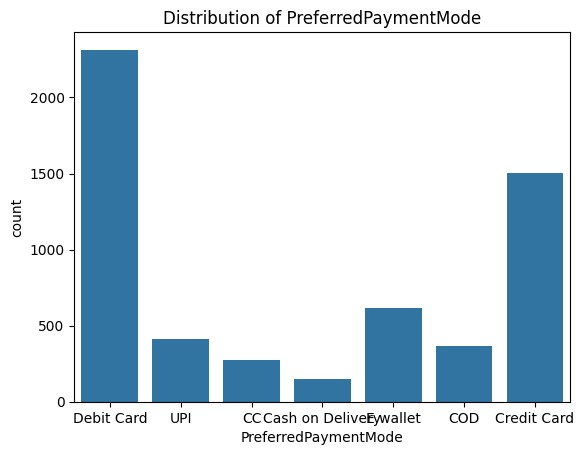

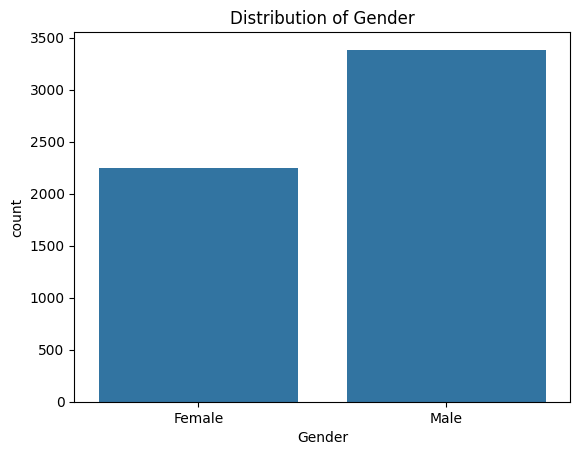

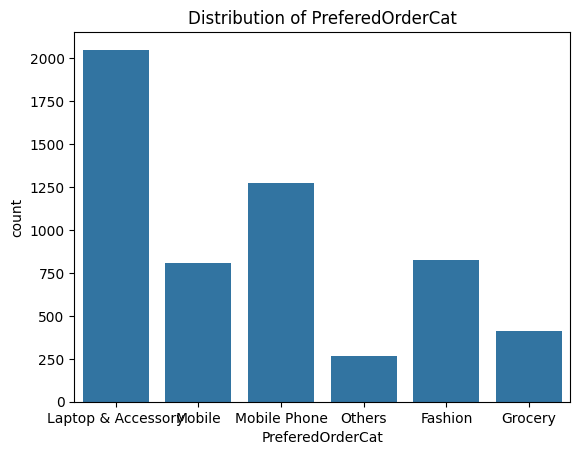

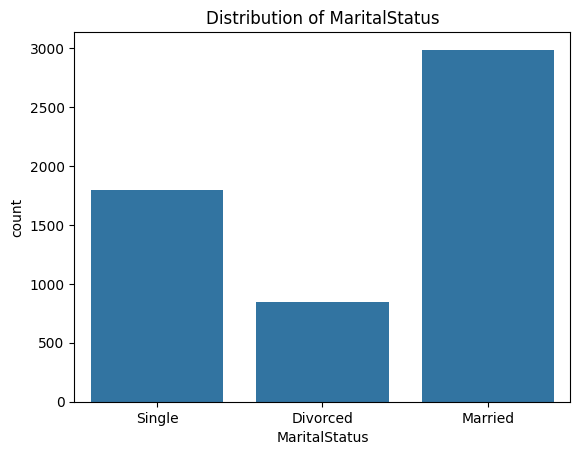

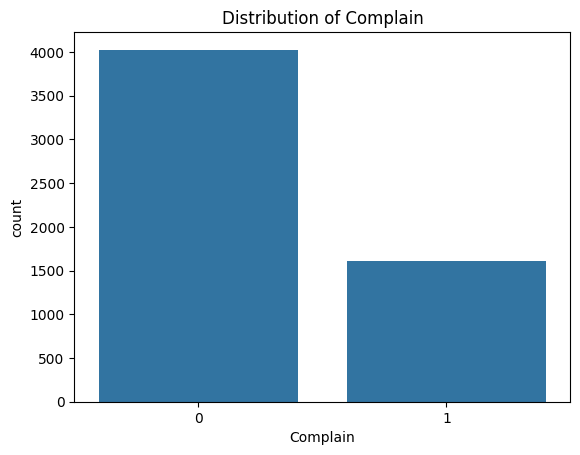

In [ ]:
numerical_features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.show()

categorical_features = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['PreferredLoginDevice']= label_encoder.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode']= label_encoder.fit_transform(df['PreferredPaymentMode'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['PreferedOrderCat']= label_encoder.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])

df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,1,1,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,3.0,225
5627,55628,0,1.0,1,1,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,179


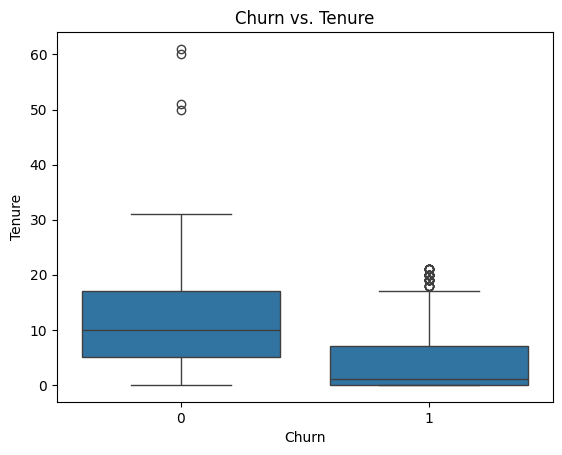

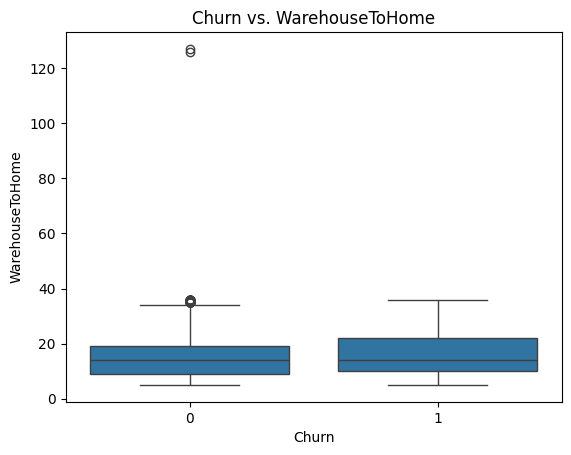

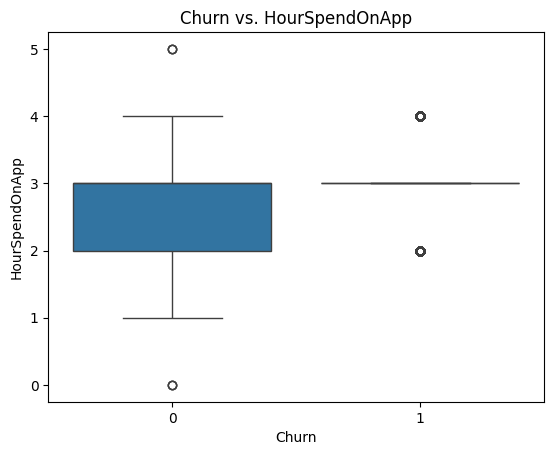

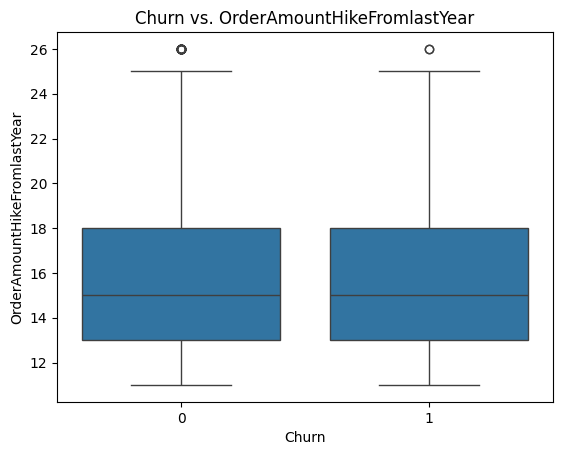

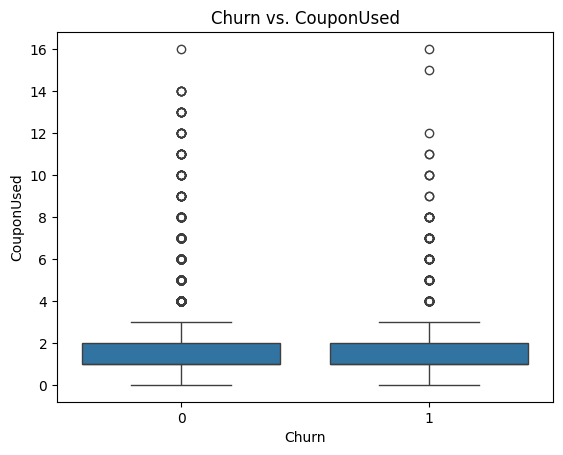

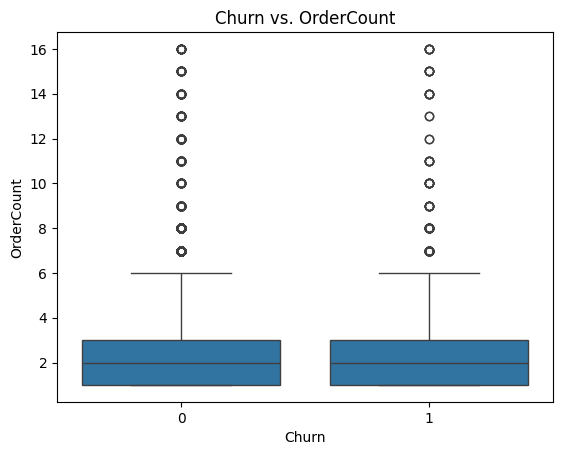

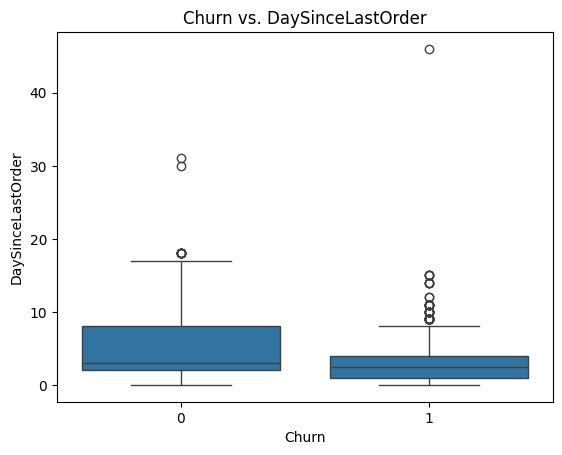

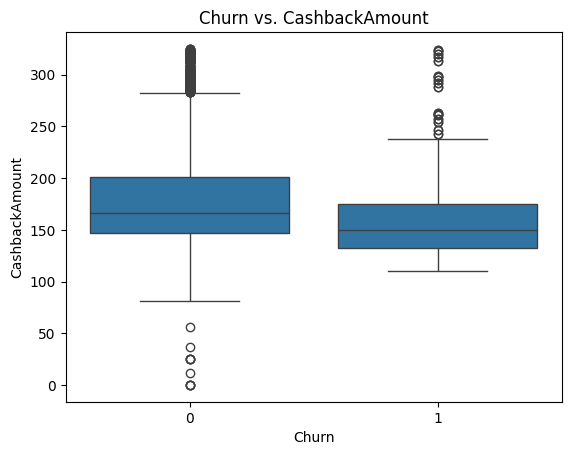

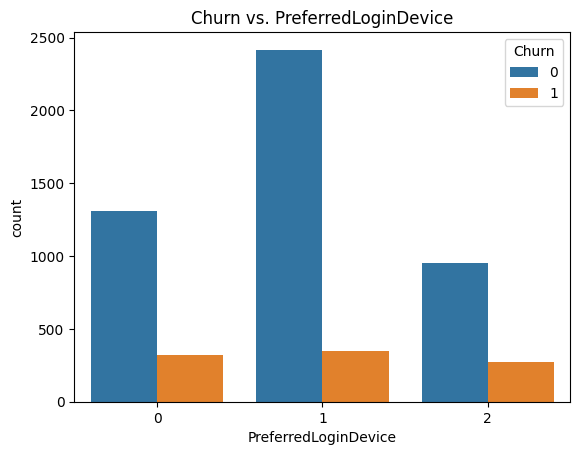

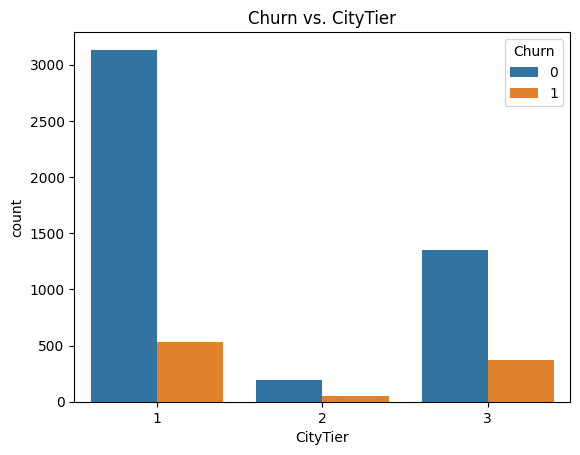

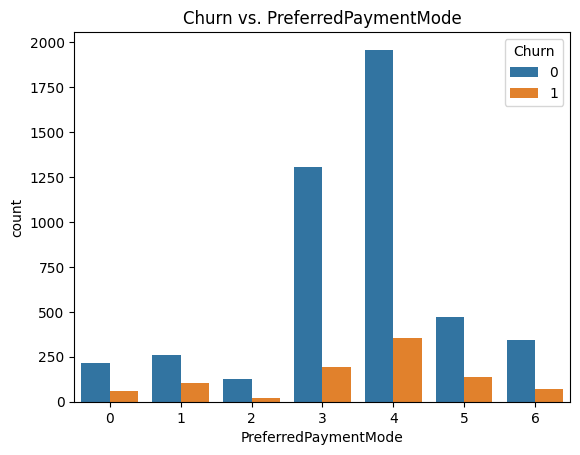

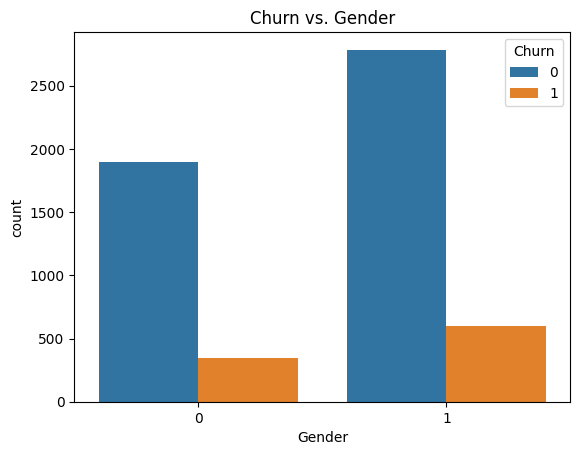

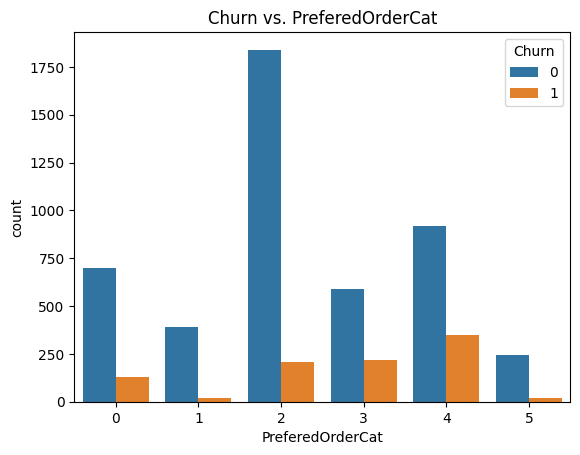

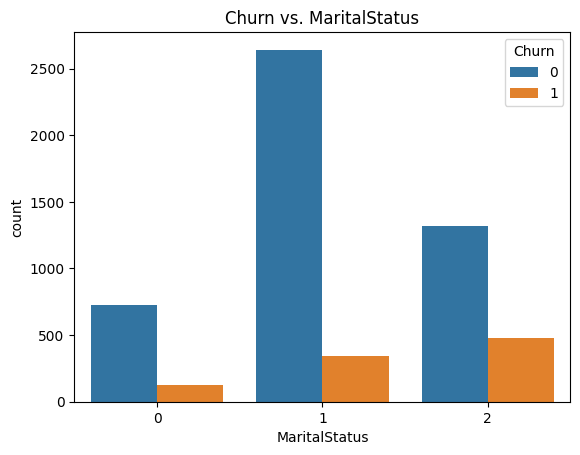

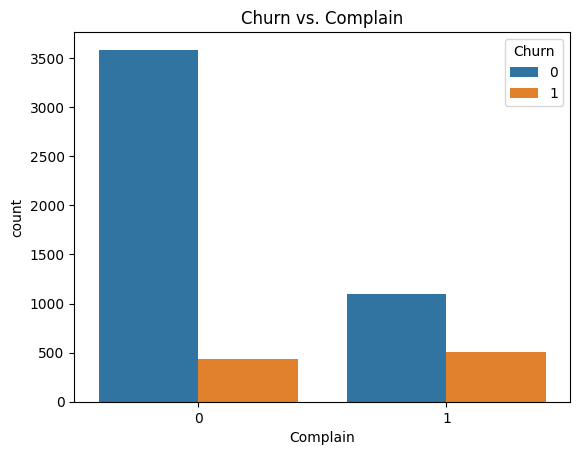

In [ ]:
correlation_matrix = df.corr()

for feature in numerical_features:
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn vs. {feature}')
    plt.show()

for feature in categorical_features:
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn vs. {feature}')
    plt.show()


In [ ]:
features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


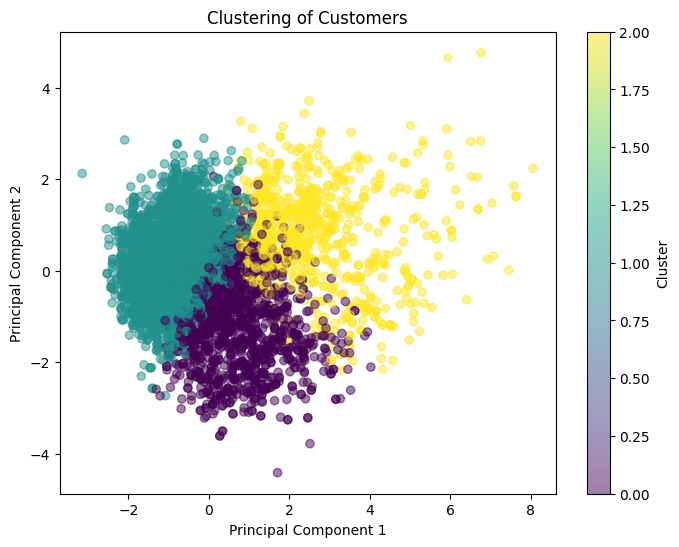

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df['Cluster'] = clusters
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,...,2,2,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,1,9.0,2,1,8.0,6,1,3.0,4,...,3,2,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,1,9.0,2,1,30.0,4,1,2.0,4,...,3,2,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,...,5,2,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,1,0.0,2,1,12.0,0,1,3.0,3,...,5,2,3,0,11.0,1.0,1.0,3.0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,0,1,30.0,3,1,3.0,2,...,1,1,6,0,18.0,1.0,2.0,4.0,151,1
5626,55627,0,13.0,1,1,13.0,3,1,3.0,5,...,5,1,6,0,16.0,1.0,2.0,3.0,225,0
5627,55628,0,1.0,1,1,11.0,4,1,3.0,2,...,4,1,3,1,21.0,1.0,2.0,4.0,186,1
5628,55629,0,23.0,0,3,9.0,3,1,4.0,5,...,4,1,4,0,15.0,2.0,2.0,9.0,179,0


In [ ]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=X.columns)

centroid_df['Cluster'] = range(1, n_clusters+1)
print("Cluster Centroids with Feature Values:")
print(centroid_df)

for cluster in range(1, n_clusters+1):
    print(f"\nFeatures significantly affecting Cluster {cluster}:")
    for feature in X.columns:
        centroid_range = centroid_df[feature].max() - centroid_df[feature].min()
        print(f"{feature}: {centroid_range:.2f}")


Cluster Centroids with Feature Values:
     Tenure  WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
0  1.192664         0.087010        0.014805                     0.000340   
1 -0.495018        -0.027940       -0.045600                     0.005540   
2  0.194539        -0.020014        0.167528                    -0.023718   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  Cluster  
0   -0.179793   -0.192068           0.318934        0.955064        1  
1   -0.331733   -0.388184          -0.360049       -0.470747        2  
2    1.671223    1.926783           1.004813        0.466908        3  

Features significantly affecting Cluster 1:
Tenure: 1.69
WarehouseToHome: 0.11
HourSpendOnApp: 0.21
OrderAmountHikeFromlastYear: 0.03
CouponUsed: 2.00
OrderCount: 2.31
DaySinceLastOrder: 1.36
CashbackAmount: 1.43

Features significantly affecting Cluster 2:
Tenure: 1.69
WarehouseToHome: 0.11
HourSpendOnApp: 0.21
OrderAmountHikeFromlastYear: 0.03
CouponUsed: 2.0

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9635879218472468
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.99      0.78      0.88       185

    accuracy                           0.96      1126
   macro avg       0.98      0.89      0.93      1126
weighted avg       0.96      0.96      0.96      1126



In [ ]:
new_data = pd.DataFrame({
    'CustomerID': [1001, 1002, 1003, 1004, 1005],
    'Tenure': [12, 20, 24, 18, 8],
    'PreferredLoginDevice': ['Mobile', 'Mobile', 'Desktop', 'Mobile', 'Desktop'],
    'CityTier': [2, 1, 3, 2, 1],
    'WarehouseToHome': [10, 5, 20, 10, 15],
    'PreferredPaymentMode': ['Card', 'Card', 'Cash', 'Card', 'Cash'],
    'Gender': ['M', 'F', 'M', 'M', 'F'],
    'HourSpendOnApp': [2.5, 15.0, 3.0, 2.0, 1.0],
    'NumberOfDeviceRegistered': [3, 2, 4, 2, 1],
    'PreferedOrderCat': ['Electronics', 'Clothing', 'Electronics', 'Grocery', 'Electronics'],
    'SatisfactionScore': [4, 3, 5, 4, 2],
    'MaritalStatus': ['Married', 'Single', 'Single', 'Married', 'Single'],
    'NumberOfAddress': [2, 1, 3, 2, 1],
    'Complain': [1, 0, 0, 0, 1],
    'OrderAmountHikeFromlastYear': [15, 25, 20, 12, 8],
    'CouponUsed': [2, 5, 3, 2, 0],
    'OrderCount': [10, 5, 15, 8, 3],
    'DaySinceLastOrder': [7, 3, 5, 10, 20],
    'CashbackAmount': [10, 5, 15, 8, 3],
    'Cluster': [1, 0, 1, 2, 1]
})
new_data['PreferredLoginDevice'] = label_encoder.fit_transform(new_data['PreferredLoginDevice'])
new_data['PreferredPaymentMode'] = label_encoder.fit_transform(new_data['PreferredPaymentMode'])
new_data['Gender'] = label_encoder.fit_transform(new_data['Gender'])
new_data['PreferedOrderCat'] = label_encoder.fit_transform(new_data['PreferedOrderCat'])
new_data['MaritalStatus'] = label_encoder.fit_transform(new_data['MaritalStatus'])


In [ ]:
new_data_predictions = model.predict(new_data)
print("Predictions for New Data:")
print(new_data_predictions)

Predictions for New Data:
[1 0 1 1 1]
